# Train error vs Test error
- 테스트 데이터에 대한 추정기의 성능이 학습 데이터에 대한 성능과 어떻게 다른지 보여줌

## Generate sample data

In [1]:
import numpy as np

from sklearn import linear_model
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

n_samples_train, n_samples_test, n_features = 75, 150, 500
X, y, coef = make_regression(
    n_samples=n_samples_train + n_samples_test,
    n_features=n_features,
    n_informative=50,
    shuffle=False,
    noise=1.0,
    coef=True,
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=n_samples_train, test_size=n_samples_test, shuffle=False
)

## Coompute train and test errors

In [2]:
alphas = np.logspace(-5, 1, 60)
enet = linear_model.ElasticNet(l1_ratio=0.7, max_iter=10000)
train_errors = list()
test_errors = list()
for alpha in alphas:
    enet.set_params(alpha=alpha)
    enet.fit(X_train, y_train)
    train_errors.append(enet.score(X_train, y_train))
    test_errors.append(enet.score(X_test, y_test))

i_alpha_optim = np.argmax(test_errors)
alpha_optim = alphas[i_alpha_optim]
print("Optimal regularization parameter : %s" % alpha_optim)

# 최적의 정규화 매개 변수를 사용하여 전체 데이터에 대한 coef_ 추정
enet.set_params(alpha=alpha_optim)
coef_ = enet.fit(X, y).coef_

Optimal regularization parameter : 0.000335292414924956


## Plot results functions

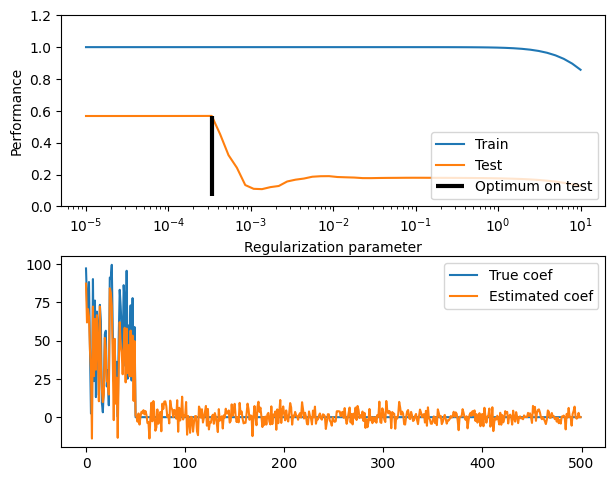

In [3]:
import matplotlib.pyplot as plt

plt.subplot(2, 1, 1)
plt.semilogx(alphas, train_errors, label="Train")
plt.semilogx(alphas, test_errors, label="Test")
plt.vlines(
    alpha_optim,
    plt.ylim()[0],
    np.max(test_errors),
    color="k",
    linewidth=3,
    label="Optimum on test",
)
plt.legend(loc="lower right")
plt.ylim([0, 1.2])
plt.xlabel("Regularization parameter")
plt.ylabel("Performance")

# 평가된 coef_ vs 실제 coef 보이기
plt.subplot(2, 1, 2)
plt.plot(coef, label="True coef")
plt.plot(coef_, label="Estimated coef")
plt.legend()
plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.26)
plt.show()